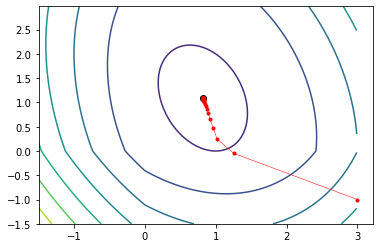

In [26]:
# requirement
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cv
import itertools

class Proximal_gradient_method:
    def __init__(self):
        self.w_1 = np.arange(-1.5,3,0.01)
        self.w_2 = np.arange(-1.5,3,0.02)
        self.W1, self.W2 = np.mgrid[-1.5:3:0.01, -1.5:3:0.02]
        # 評価関数値
        self.Value = np.zeros((len(self.w_1), len(self.w_2)))
        # 重み行列
        self.A = np.array([[3, 0.5],[0.5, 1]])
        # 平均
        self.mu = np.array([[1],[2]])
        # 初期値
        self.x_init = np.array([[3], [-1]])
        # 正則化項係数
        self.lamda = 2
        
    def calc_eval_fun(self):
        # 評価関数値の計算
        for i in range(len(self.w_1)):
            for j in range(len(self.w_2)):
                w = np.vstack([self.w_1[i], self.w_2[j]])
                self.Value[i, j] = np.dot(np.dot((w - self.mu).T, self.A), w - self.mu) \
                                 + self.lamda * (np.abs(self.w_1[i]) + np.abs(self.w_2[j]))
    
    def ops(self, mu, q):
        x_proj = np.zeros(mu.shape)
        for i in range(len(mu)):
            if mu[i] > q:
                x_proj[i] = mu[i] - q
            else:
                if np.abs(mu[i]) < q:
                    x_proj[i] = 0
                else:
                    x_proj[i] = mu[i] + q; 
                
        return x_proj
    
    def main(self):
        # cvx
        w_lasso = cv.Variable((2,1))
        J = cv.quad_form(w_lasso - self.mu, self.A) +  self.lamda * cv.norm(w_lasso, 1)
        objective = cv.Minimize(J)
        constraints = []
        prob = cv.Problem(objective, constraints)
        result = prob.solve(solver = cv.CVXOPT) 
        w_lasso = w_lasso.value

        plt.contour(self.W1, self.W2, self.Value)
        
        L = 1.01 * np.max(np.linalg.eig(2 * self.A)[0])
        x_history = []
        xt = self.x_init
        for t in range(1000):
            x_history.append(xt.T)
            # 勾配
            grad = 2 * np.dot(self.A, xt - self.mu)
            xth  = xt - 1 / L * grad
            xt   = self.ops(xth, self.lamda * 1 / L)

        x_history = np.vstack(x_history)
        plt.plot(w_lasso[0], w_lasso[1], 'ko')
        plt.plot(x_history[:, 0], x_history[:, 1], 'ro-', markersize = 3, linewidth = 0.5)
        

pd = Proximal_gradient_method()
pd.calc_eval_fun()
pd.main()